# Анализ деятельности интернет-магазина по продаже компьютерных игр

У нас имеются данные о продажах игр за последние годы, оценки пользователей и экспертов, жанры и платформы. Цель прокта - выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламную кампанию на следующий год.

В таблице имеются следующие данные:

 - Name — название игры
 - Platform — платформа
 - Year_of_Release — год выпуска
 - Genre — жанр игры
 - NA_sales — продажи в Северной Америке (миллионы проданных копий)
 - EU_sales — продажи в Европе (миллионы проданных копий)
 - JP_sales — продажи в Японии (миллионы проданных копий)
 - Other_sales — продажи в других странах (миллионы проданных копий)
 - Critic_Score — оценка критиков (максимум 100)
 - User_Score — оценка пользователей (максимум 10)
 - Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.
 
План работы будет таким:
1. Сначала загрузим данные, изучим общую информацию
2. Проведем предобработку данных (добавим необходимые для работы столбцы, поищем пропущенные значения и дубликаты, изучим типы данных и т.д.)
3. Проведем исследовательский анализ данных (опишем и визуализируем информацию о платформах, жанрах, годах выпуска, о продажах, определимся с актуальным периодом данных, выберем популярные жанры и платформы)
4. Составим портрет пользователя каждого региона
6. Проверим гипотезы
7. Сделаем выводы

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
from scipy.stats import binom
import seaborn as sns

### 1. Загрузка данных

#### 1.1. 
Сначала попытаемся открыть файлы с датасетом

In [2]:
try:
    data = pd.read_csv('/kaggle/input/datagames/games.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')

#### 1.2.
Посмотрим первые строки датасетов

In [3]:
data.head(20)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Уже по первым строкам видно, что предстоит работа по подготовке данных к анализу. Есть пропуски, названия колонок названы не совсем правильно. Теперь посмотрим общую информацию о данных.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


В датасете 16715 строк, полностью данные имеются в 5 колонках. Кроме того, в некоторых колонках явно не тот тип данных. Это надо будет менять на этапе предобработки данных.

### 2. Предобработка данных

#### 2.1.
Сначала поменяем названия столбцов (приведем к нижнему регистру)

In [5]:
data.columns = data.columns.str.lower()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


#### 

2.2. Попробуем поменять формат данных в колонке year_of_release на формат int, в колонке user_score на float, потому что там должны быть числовые значения.

Судя по info в столбце year_of_release есть пропуски, а значит нужно сначала избавиться от них, прежде чем менять тип данных.

In [6]:
data[data['year_of_release'].isna()].head(20)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
627,Rock Band,X360,NaN,Misc,1.93,0.33,0.00,0.21,92.0,8.2,T
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.00,0.07,73.0,tbd,E
678,LEGO Indiana Jones: The Original Adventures,Wii,NaN,Action,1.51,0.61,0.00,0.21,78.0,6.6,E10+
719,Call of Duty 3,Wii,NaN,Shooter,1.17,0.84,0.00,0.23,69.0,6.7,T
805,Rock Band,Wii,NaN,Misc,1.33,0.56,0.00,0.20,80.0,6.3,T


Судя по названиям некоторых из этих игр, они довольно старые, к тому же этих строк не так много - менее 2% от датасета, поэтому их можно удалить.

In [7]:
data = data.dropna(subset=['year_of_release'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16446 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


Вот теперь можно менять тип данных.

In [8]:
data = data.astype({'year_of_release':'int'})
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Прежде чем менять тип данных в колонке user_score посмотрим, какие уникальные значения там имеются. Неспроста же там тип стоит object.

In [9]:
data['user_score'].sort_values().unique()

array(['0', '0.2', '0.3', '0.5', '0.6', '0.7', '0.9', '1', '1.1', '1.2',
       '1.3', '1.4', '1.5', '1.6', '1.7', '1.8', '1.9', '2', '2.1', '2.2',
       '2.3', '2.4', '2.5', '2.6', '2.7', '2.8', '2.9', '3', '3.1', '3.2',
       '3.3', '3.4', '3.5', '3.6', '3.7', '3.8', '3.9', '4', '4.1', '4.2',
       '4.3', '4.4', '4.5', '4.6', '4.7', '4.8', '4.9', '5', '5.1', '5.2',
       '5.3', '5.4', '5.5', '5.6', '5.7', '5.8', '5.9', '6', '6.1', '6.2',
       '6.3', '6.4', '6.5', '6.6', '6.7', '6.8', '6.9', '7', '7.1', '7.2',
       '7.3', '7.4', '7.5', '7.6', '7.7', '7.8', '7.9', '8', '8.1', '8.2',
       '8.3', '8.4', '8.5', '8.6', '8.7', '8.8', '8.9', '9', '9.1', '9.2',
       '9.3', '9.4', '9.5', '9.6', '9.7', 'tbd', nan], dtype=object)

Мы видим, что есть строки, в которых оценка установлена, как строка со значением tbd (что значит "не определен"). Думаю их можно заменить на Nan, после чего уже менять формат данных.

In [10]:
data['user_score'] = data['user_score'].replace('tbd', np.nan)

In [11]:
data = data.astype({'user_score':'float'})
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16446 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


#### 2.3.
Теперь займемся другими пропущенными значениями и дублями. Для начала посчитаем их.

In [12]:
data.isna().sum()

name                  2
platform              0
year_of_release       0
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8463
user_score         8983
rating             6678
dtype: int64

Обращает на себя внимание 2 строки с пропущенным названием игры и жанром. Посмотрим, что там такое.

In [13]:
data[data['name'].isna()].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Похоже, эти строки можно просто удалить

In [14]:
data = data.dropna(subset=['name'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


Изучим уникальные значения столбца с рейтингом.

In [15]:
data['rating'].sort_values().unique()

array(['AO', 'E', 'E10+', 'EC', 'K-A', 'M', 'RP', 'T', nan], dtype=object)

Прочитав описание рейтингов в интернете, стало известно, что 'K-A' это старое название 'E', а 'RP' это рейтинг еще не определен, то есть по сути nan. Значит можно 'K-A' заменить на 'E', а 'RP' на nan.

In [16]:
data['rating'] = data['rating'].replace('RP', np.nan)
data['rating'] = data['rating'].replace('K-A', 'E')
data['rating'].sort_values().unique()

array(['AO', 'E', 'E10+', 'EC', 'M', 'T', nan], dtype=object)

In [17]:
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating             6677
dtype: int64

Осталось решить, что делать с пропусками в оценках критиков и игроков и в рейтинге. Посмотрим первые 5 строк и последние 5 строк с такими пропусками.

In [18]:
data[data['user_score'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Похоже это либо очень новые игры, которые еще не оценили, либо очень старые, когда оценки и рейтинги не составлялись. Думаю, нужно оставить эти пропуски, как есть, потому что заменить их вряд ли получится без искажения данных, но и удалить их нельзя, так как их очень много. 

Посмотрим еще, какие значения встречаются в колонках с жанром, платформой, чтобы понять, нет ли там неявных дубликатов.

In [19]:
data['genre'].sort_values().unique()

array(['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle',
       'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports',
       'Strategy'], dtype=object)

In [20]:
data['platform'].sort_values().unique()

array(['2600', '3DO', '3DS', 'DC', 'DS', 'GB', 'GBA', 'GC', 'GEN', 'GG',
       'N64', 'NES', 'NG', 'PC', 'PCFX', 'PS', 'PS2', 'PS3', 'PS4', 'PSP',
       'PSV', 'SAT', 'SCD', 'SNES', 'TG16', 'WS', 'Wii', 'WiiU', 'X360',
       'XB', 'XOne'], dtype=object)

Похоже, в этих столбцах всё нормально. Осталось посмотреть, есть ли явные дубликаты в датасете.

In [21]:
data.duplicated().sum()

0

Их нет. 

#### 2.4.
Теперь создадим еще один столбец, где будет суммарное количество копий проданных игр по всем регионам.

In [22]:
data['all_sales']=data['na_sales']+data['eu_sales']+data['jp_sales']+data['other_sales']

In [23]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


***Вывод:*** Таким образом мы провели проверку данных на дубликаты и убрали имеющиеся неявные дубликаты в столбцах user_score и rating путем замены их на аналогичные по смыслу. Нашли пропущенные значения в столбцах с названием игр и жанром (их было всего 2), удалили эти строки, также удалили 1.5% строк от общего датасета, в которых не заполнен год выпуска. Пропуски в других колонках пока не стали трогать. Кроме того, изменили формат в колонках с годом выпуска и оценкой пользователей и добавили колонку с суммарным количеством копий проданных игр по всем регионам. Теперь можно заниматься анализом.

### 3. Исследовательский анализ данных

#### 3.1.
Для начала посмотрим, сколько игр выпускалось в разные годы.

In [24]:
data['year_of_release'].describe()

count    16444.000000
mean      2006.486256
std          5.875525
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2016.000000
Name: year_of_release, dtype: float64

In [25]:
data['year_of_release'].value_counts(ascending=False)

year_of_release
2008    1427
2009    1426
2010    1255
2007    1197
2011    1136
2006    1006
2005     939
2002     829
2003     775
2004     762
2012     653
2015     606
2014     581
2013     544
2016     502
2001     482
1998     379
2000     350
1999     338
1997     289
1996     263
1995     219
1994     121
1993      60
1981      46
1992      43
1991      41
1982      36
1986      21
1989      17
1983      17
1990      16
1987      16
1988      15
1985      14
1984      14
1980       9
Name: count, dtype: int64

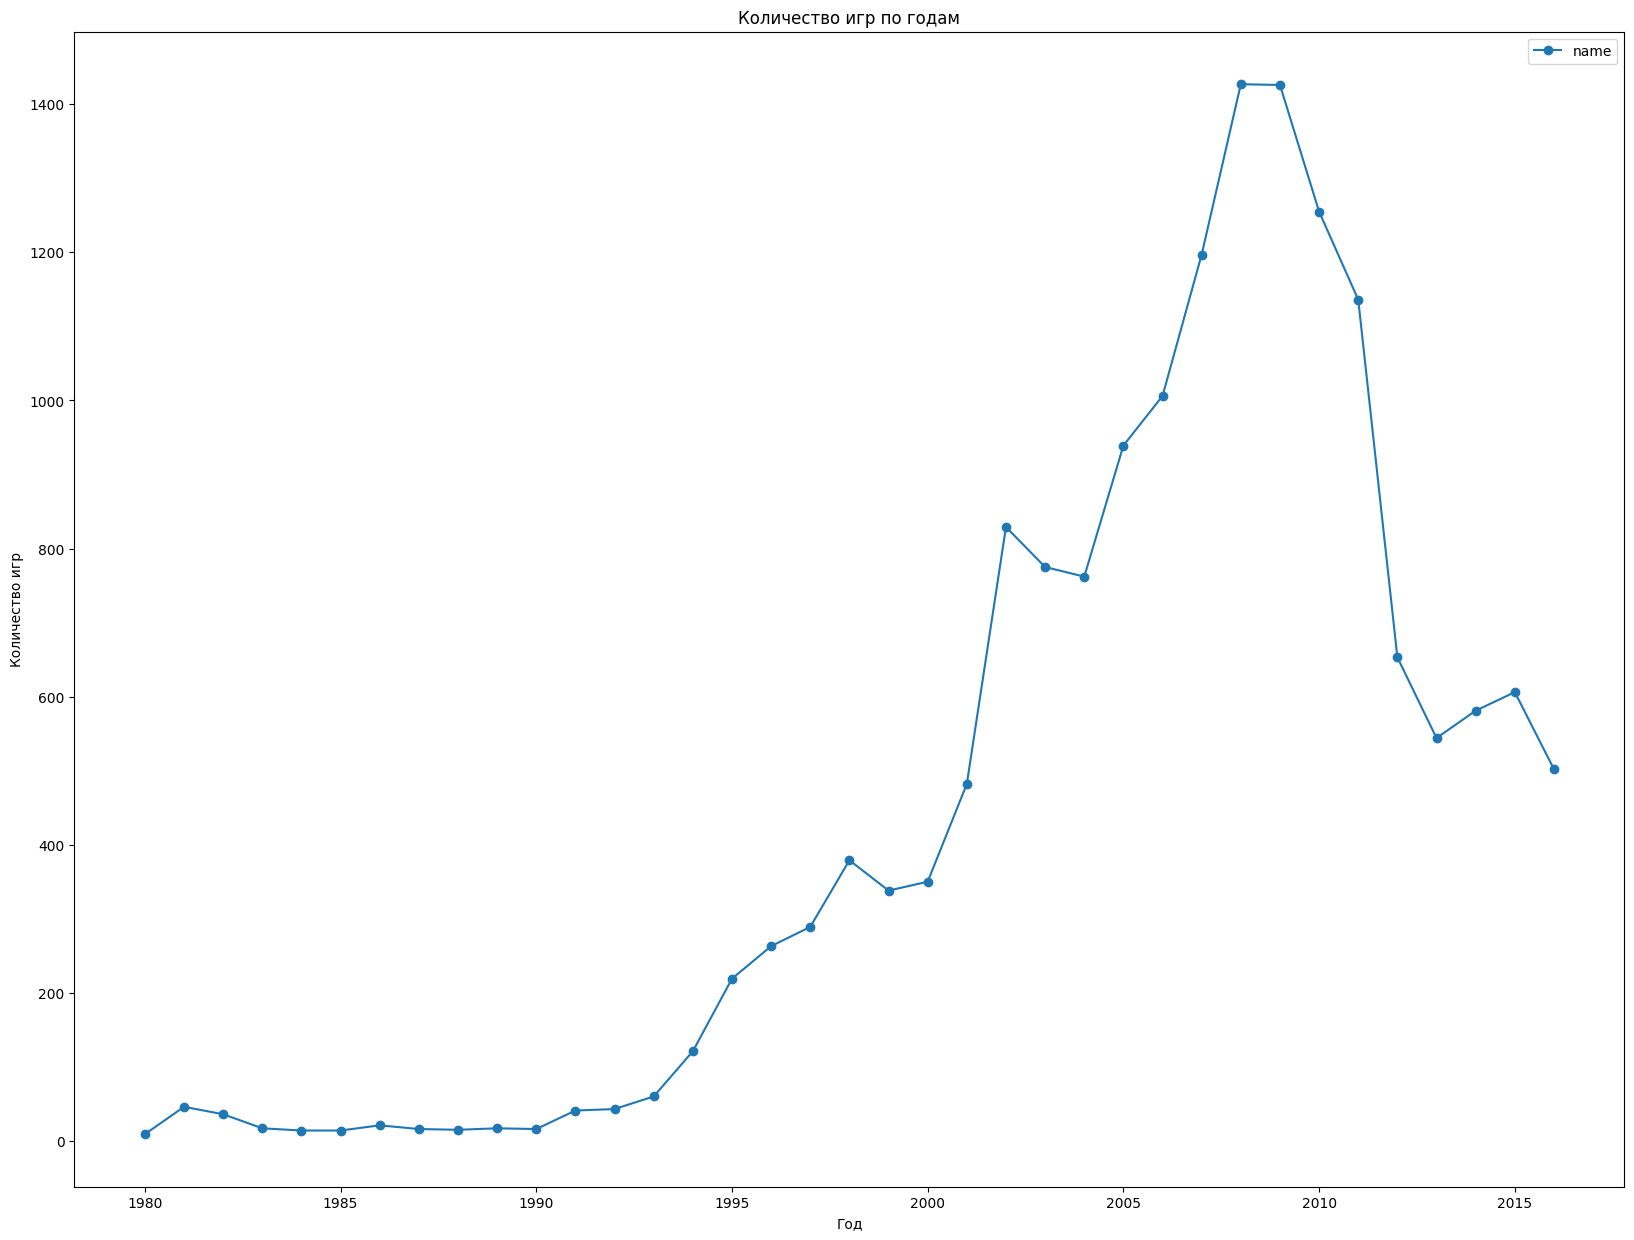

In [26]:
data.pivot_table(index='year_of_release', values='name', aggfunc='count').plot(style='-o', title='Количество игр по годам', 
                                                                               xlabel='Год', ylabel='Количество игр', 
                                                                               figsize=(20,15));

Видно, что больше всего игр выпущено с 2005 до 2011 годы. Видимо в связи с развитием мобильных игр в дальнейшем число выпускаемых игр для других платформ пошло на убыль. Если взять шире, то явное большинство игр было выпущено в 21 веке. Скорее всего для дальнейшего анализа нам пригодятся именно эти игры.

#### 3.2.

Теперь попробуем понять, как долго востребованы различные платформы. Конечно же в первую очередь нас интересуют популярные платформы. Для этого сначала сделаем выборку платформ по суммарному количеству проданных игр и возьмем 5 самых популярных.

In [27]:
data.pivot_table(index='platform', values='all_sales',
                   aggfunc='sum').sort_values(by='all_sales', ascending=False).head()

,all_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78


Теперь по этим 5 платформам построим график, чтобы понять, сколько лет к ним выпускаются игры.

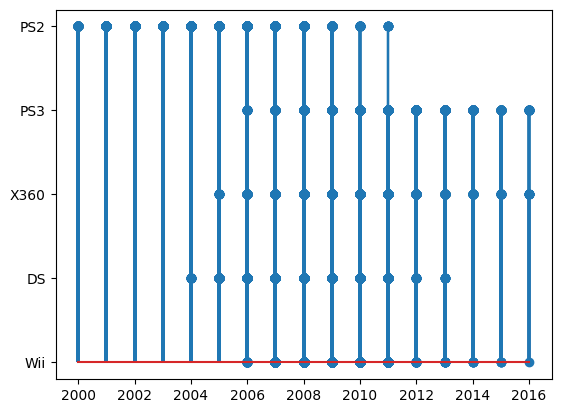

In [28]:
t=data.query('(platform in ["PS2", "PS3", "DS", "Wii", "X360"]) and year_of_release>1985')
fig, ax = plt.subplots()
ax.stem(t['year_of_release'], t['platform'])
plt.show()

*В запросе пришлось добавить одно из условий, что год выпуска старше 1985 года, потому что нашлась одна явно ошибочная строка, где была игра, выпущенная в 1985 году для платформы DS.*

Мы видим, что средний срок использования популярных платформ около 11 лет, соответственно для нашего исследования явно не будут нужны данные об играх на платформах, которые в 2017 году уже точно не будут функционировать. Но ведь продажи от года к году могут быть разными. Посмотрим как распределялись продажи по нескольким популярным платформам по годам релиза игр.

Но сначала создадим функцию, которая поможет нам быстрее строить несколько графиков на одной картинке.

In [29]:
platforms=['PS2','PS3','X360','Wii']
def todoplot(df, val, agg):
    for i in platforms:
        plt.plot(df.query('platform==@i').pivot_table(index='year_of_release', values=val, aggfunc=agg), 'o-')

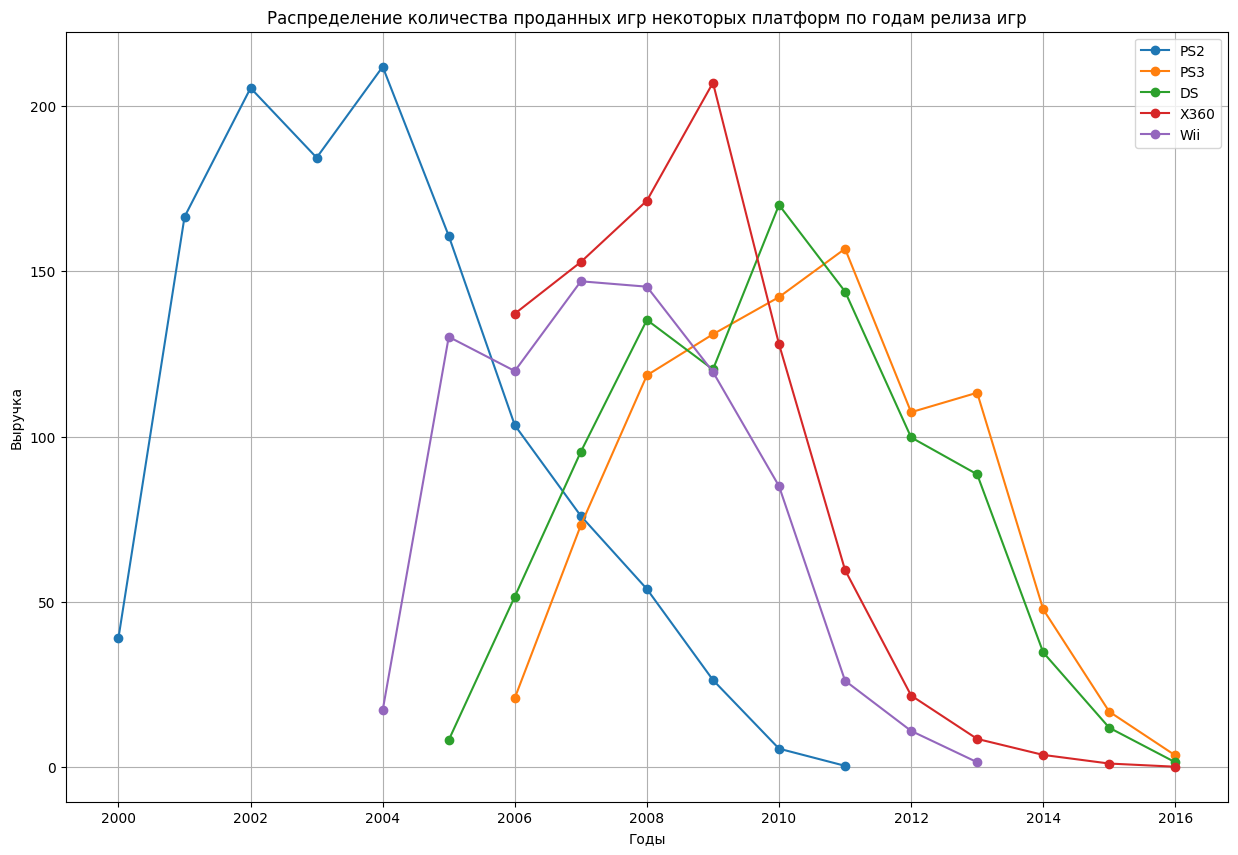

In [30]:
plt.figure(figsize=(15,10));
todoplot(data, 'all_sales', 'sum')
plt.plot(data.query('platform=="DS" and year_of_release>1985').pivot_table(index='year_of_release',
                                                                           values='all_sales', aggfunc='sum'), 'o-');
plt.grid(visible=bool);
plt.xlabel('Годы');
plt.ylabel('Выручка');
plt.legend(('PS2', 'PS3', 'DS', 'X360', 'Wii'));
plt.title('Распределение количества проданных игр некоторых платформ по годам релиза игр')
plt.show();

Похоже, что максимальные продажи игр на платформах наблюдаются обычно 3-4 года, поэтому попробуем для дальнейшего анализа взять платформы с годом выпуска игр, начиная с 2014 года.

#### 3.3.

Создадим новый датасет, в котором оставим только игры, выпущенные после 2013 года.

In [31]:
data_new=data.query('year_of_release>2013')
data_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1689 entries, 31 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             1689 non-null   object 
 1   platform         1689 non-null   object 
 2   year_of_release  1689 non-null   int64  
 3   genre            1689 non-null   object 
 4   na_sales         1689 non-null   float64
 5   eu_sales         1689 non-null   float64
 6   jp_sales         1689 non-null   float64
 7   other_sales      1689 non-null   float64
 8   critic_score     718 non-null    float64
 9   user_score       888 non-null    float64
 10  rating           940 non-null    object 
 11  all_sales        1689 non-null   float64
dtypes: float64(7), int64(1), object(4)
memory usage: 171.5+ KB


Посмотрим, какая платформы наиболее популярны за последние 3 года.

In [32]:
data_new.pivot_table(index='platform', values='all_sales', 
                     aggfunc=['sum', 'count']).sort_values(by=('sum','all_sales'), ascending=False)

,sum,count
,all_sales,all_sales
platform,,
PS4,288.15,376
XOne,140.36,228
3DS,86.68,212
PS3,68.18,219
X360,48.22,111
WiiU,42.98,73
PC,27.05,151
PSV,22.40,295


Мы видим, что по продажам лидируют 2 платформы: PS4 и XOne. Динамику платформ PS3, X360, Wii мы смотрели раньше и видели, что их время уже проходит. Теперь попробуем посмотреть динамику более свежих платформ, а именно PS4, XOne, 3DS, WiiU, PSV и PSP. Ну и не забудем про "вечную" платформу для игр - персональный компьютер.

In [33]:
platforms=['PS4','PSV','3DS','XOne','WiiU','PSP','PC']

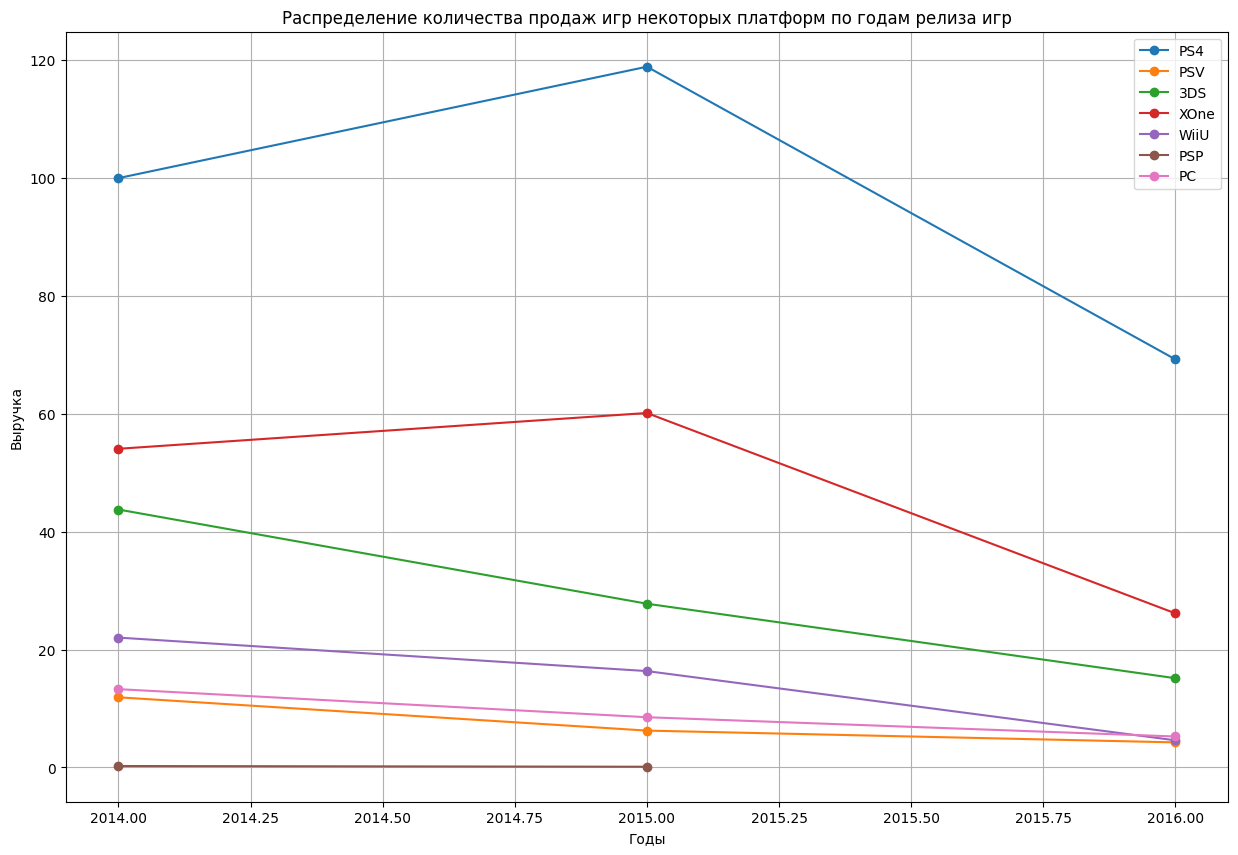

In [34]:
plt.figure(figsize=(15,10));
todoplot(data_new, 'all_sales', 'sum')
plt.grid(visible=bool);
plt.xlabel('Годы');
plt.ylabel('Выручка');
plt.legend(('PS4', 'PSV', '3DS', 'XOne', 'WiiU', 'PSP','PC'));
plt.title('Распределение количества продаж игр некоторых платформ по годам релиза игр')
plt.show();

За 2016 год данные неполные, поэтому не будем его учитывать для анализа динамики. Видно, что потенциально прибыльными платформами в 2017 году могут стать PS4 и XOne. У них динамика положительная. Прибыль новых игр 3DS явно снижается, то же можно сказать о WiiU, PSV и PC,  PSP вообще перестал выпускать новые игры в 2016 году. 

Можно еще посмотреть динамику по количеству выпускаемых игр у данных платформ, чтобы убедиться, что мы сделали правильный вывод.

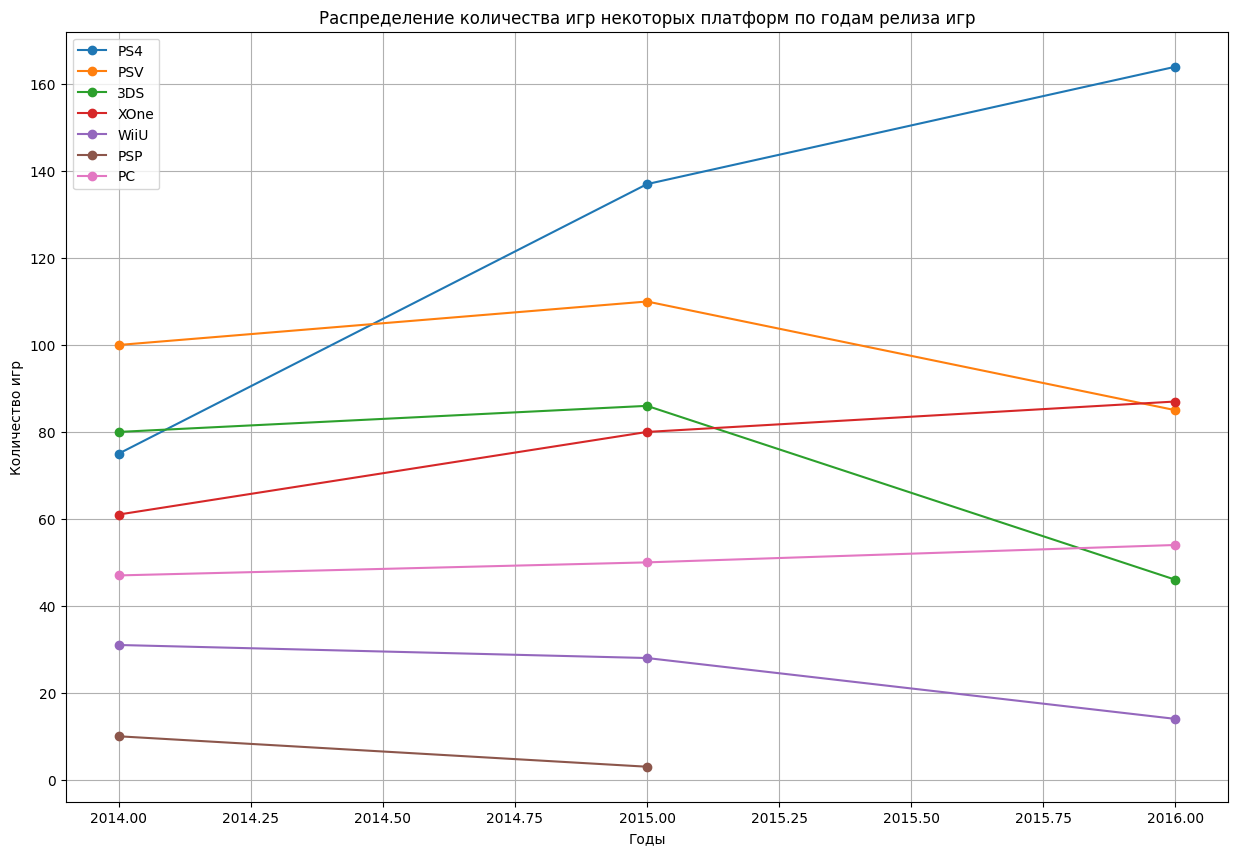

In [35]:
plt.figure(figsize=(15,10));
todoplot(data_new, 'name', 'count')
plt.grid(visible=bool);
plt.xlabel('Годы');
plt.ylabel('Количество игр');
plt.legend(('PS4', 'PSV', '3DS', 'XOne', 'WiiU', 'PSP','PC'));
plt.title('Распределение количества игр некоторых платформ по годам релиза игр')
plt.show();

И по количеству выпускаемых игр видно, что самая сильная положительная динамика у PS4 и XOne.

#### 3.4.
Теперь посмотрим распределение игр по платформам и по продажам с помощью диаграммы "ящик с усами".

In [36]:
data_new['all_sales'].describe()

count    1689.000000
mean        0.431883
std         1.056109
min         0.010000
25%         0.030000
50%         0.100000
75%         0.350000
max        14.630000
Name: all_sales, dtype: float64

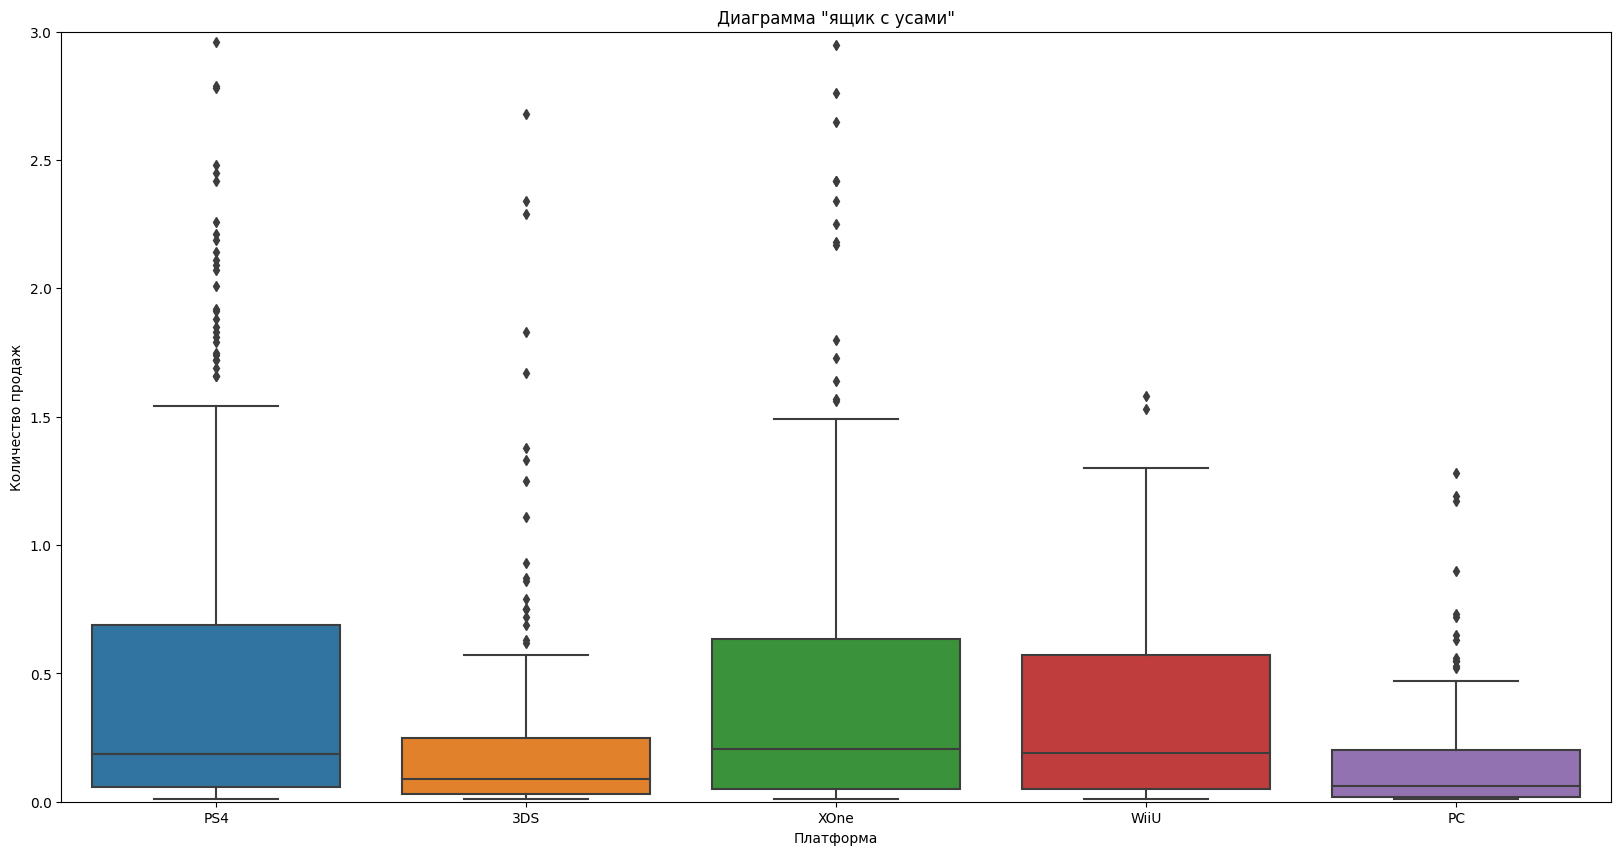

In [37]:
t=data_new.query('platform in ["PS4","3DS","XOne","WiiU","PC"]')
plt.figure(figsize=(20,10));
plt.ylim(0, 3);
sns.boxplot(data=t, x='platform', y='all_sales');
plt.title('Диаграмма "ящик с усами"');
plt.xlabel('Платформа');
plt.ylabel('Количество продаж');

Построив "ящик с усами", мы видим, что почти на всех платформах имеются выбивающиеся значения, то есть хвосты. Часть хвостов мы обрезали с помощью ylim, чтобы картина получилась нагляднее. Если посмотреть общее описание по сумме продаж, то видно, что максимум у одной игры было продано 14,6 миллион копий, минимум 1000 копий, медиана находится на уровне 10000 копий. Ящик с усами показывает медианы продаж разных платформ, мы видим, что из интересующих нас платформ в лидерах находятся всё те же PS4 и XOne. С помощью еще одной сводной таблицы можно узнать числовые значения медиан продаж.

In [38]:
data_new.pivot_table(index='platform', values='all_sales', 
                     aggfunc=['median', 'count']).sort_values(by=('median','all_sales'), ascending=False)

,median,count
,all_sales,all_sales
platform,,
XOne,0.205,228
WiiU,0.190,73
PS4,0.185,376
Wii,0.180,11
X360,0.180,111
PS3,0.110,219
3DS,0.090,212
PC,0.060,151


XOne и PS4 действительно самые потенциально популярные платформы в перспективе 2017 года, потому что медианы продаж игр для них гораздо выше, чем у других современных платформ.

#### 3.5.
Теперь посмотрим, есть ли зависимость между оценками критиков и игроков и количеством продаж игр. Для примера возьмем платформу PS4, как самую популярную в нашей выборке (с самым большим количеством выпущенных игр).

In [39]:
t=data_new.query('platform=="PS4" and all_sales<4')
t['all_sales'].corr(t['critic_score']).round(2)

0.38

In [40]:
t['all_sales'].corr(t['user_score']).round(2)

0.03

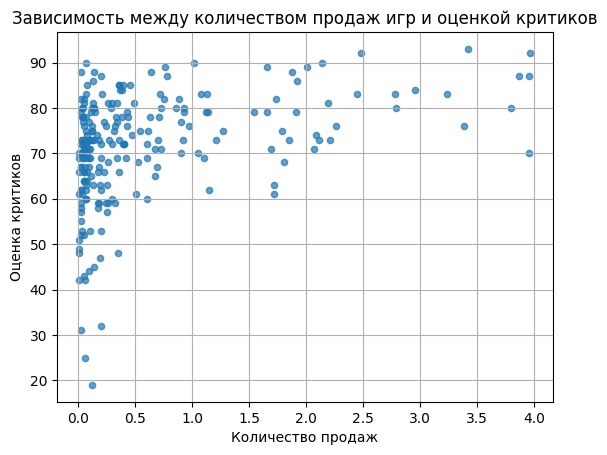

In [41]:
t.plot(x='all_sales', y='critic_score', kind ='scatter', 
           title='Зависимость между количеством продаж игр и оценкой критиков', alpha=0.7, 
           grid=True, sharex=False);
plt.xlabel('Количество продаж');
plt.ylabel('Оценка критиков');

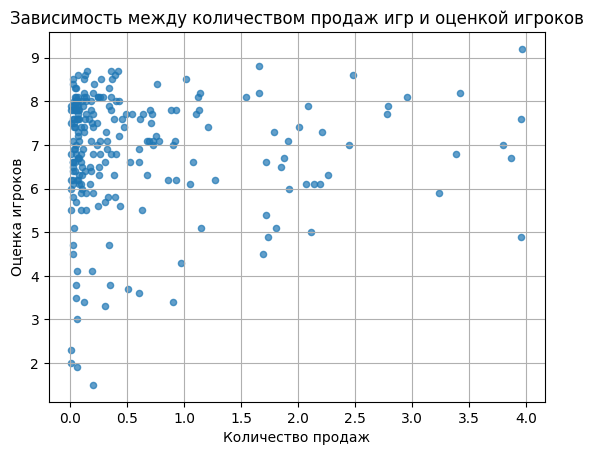

In [42]:
t.plot(x='all_sales', y='user_score', kind ='scatter', 
           title='Зависимость между количеством продаж игр и оценкой игроков', alpha=0.7, 
           grid=True, sharex=False);
plt.xlabel('Количество продаж');
plt.ylabel('Оценка игроков');

Видно, что имеется прямая зависимость между величиной оценок критиков и продажами игр, но она не очень сильная (38%), От оценки зрителей продажи практически не зависят (3%).

Посмотрим еще вторую популярную платформу XOne.

In [43]:
t=data_new.query('platform=="XOne" and all_sales<4')
t['all_sales'].corr(t['critic_score']).round(2)

0.41

In [44]:
t['all_sales'].corr(t['user_score']).round(2)

-0.08

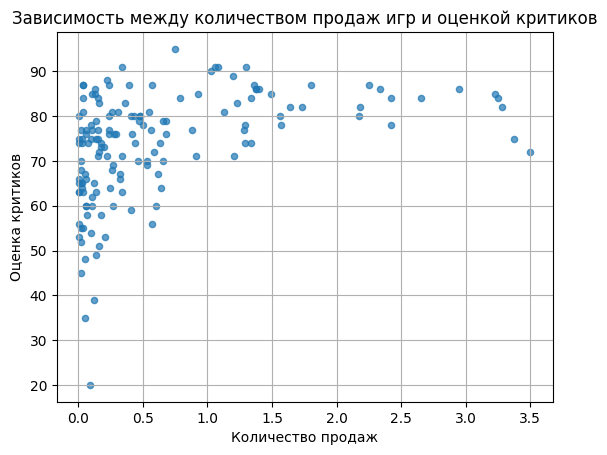

In [45]:
t.plot(x='all_sales', y='critic_score', kind ='scatter', 
           title='Зависимость между количеством продаж игр и оценкой критиков', alpha=0.7, 
           grid=True, sharex=False);
plt.xlabel('Количество продаж');
plt.ylabel('Оценка критиков');

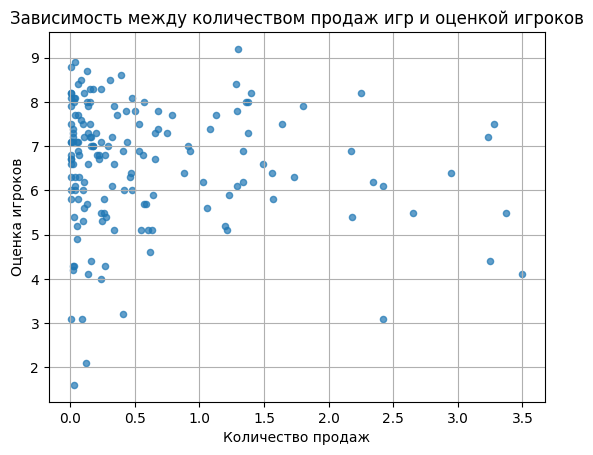

In [46]:
t.plot(x='all_sales', y='user_score', kind ='scatter', 
           title='Зависимость между количеством продаж игр и оценкой игроков', alpha=0.7, 
           grid=True, sharex=False);
plt.xlabel('Количество продаж');
plt.ylabel('Оценка игроков');

Здесь зависимость количества продаж и оценкой критиков так же прямая, не очень сильная (41%), а зависимость от оценки пользователей тоже практически отсутствует.

In [47]:
t=data_new.query('all_sales<4')
t['all_sales'].corr(t['critic_score']).round(2)

0.32

In [48]:
t['all_sales'].corr(t['user_score']).round(2)

-0.0

Если посмотреть зависимость в общем по всем платформам, то она тоже есть и тоже только от оценки критиков, но слабее чем популярных платформах.

#### 3.6.
Посмотрим распределение игр по жанрам.

In [49]:
genre=data_new.pivot_table(index='genre', values='all_sales', 
                     aggfunc=['sum', 'count','mean'])
genre.columns=['Количество проданных копий', 'Количество игр','Среднее число проданных копий на одну игру']
genre.sort_values(by=('Среднее число проданных копий на одну игру'), ascending=False)

,Количество проданных копий,Количество игр,Среднее число проданных копий на одну игру
genre,,,
Shooter,170.94,128,1.335469
Sports,109.48,161,0.680000
Platform,18.09,38,0.476053
Fighting,28.22,60,0.470333
Role-Playing,101.44,221,0.459005
Racing,27.52,69,0.398841
Misc,37.55,113,0.332301
Action,199.36,619,0.322068
Simulation,13.13,44,0.298409


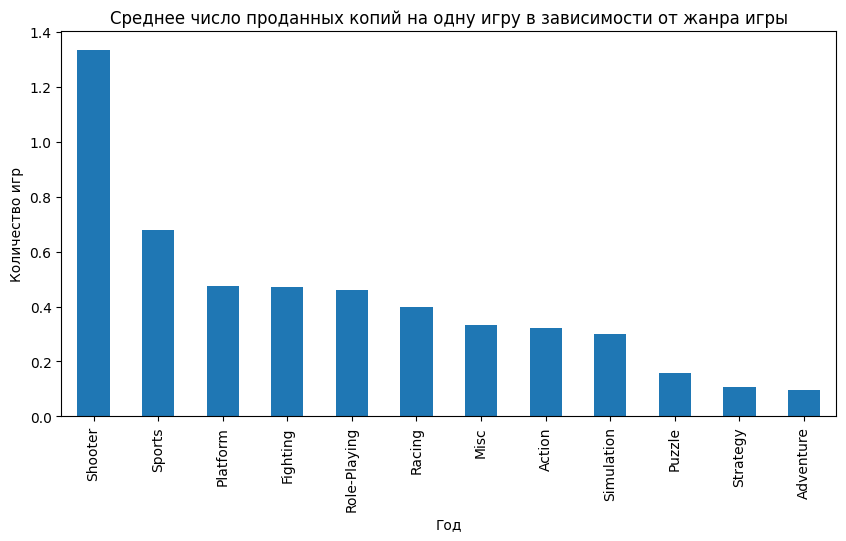

In [50]:
genre['Среднее число проданных копий на одну игру'].sort_values(ascending=False).plot.bar(title='Среднее число проданных копий на одну игру в зависимости от жанра игры',
                xlabel='Год', ylabel='Количество игр', figsize=(10,5));                                                    

Видно, что больше всего выпускается игр для жанра Action, они же и имеют самое большое число продаж, но в абсолютных цифрах. Если посмотреть среднее число продаж на одну игру, то безусловных лидером является жанр Shooter. На последнем месте по данному показателю игры жанра Adventure.

***Вывод:*** Мы завершили исследовательский анализ данных и выяснили, что больше всего игр выпущено с 2005 до 2011 года, что средний срок использования популярных платформ около 11 лет, а максимальные продажи игр на платформах наблюдаются примерно со второго по 4-5 год жизни платформы, поэтому для дальнейшего анализа мы взяли платформы с годом выпуска игр, начиная с 2014 года.

Изучив распределение количества продаж игр некоторых платформ по годам релиза игр, мы пришли к выводу, что потенциально прибыльными платформами в 2017 году могут стать PS4 и XOne. В этом мы убедились, дополнительно построив диаграмму "ящик с усами" и выяснив медианы продаж разных платформ.

Мы посмотрели зависимость между оценками критиков и игроков и количеством продаж игр и выяснили, что имеется прямая зависимость между величиной оценок критиков и продажами игр, но она не очень сильная, зависимости продаж от оценки пользователей не обнаружено.

И наконец, мы установили, что больше всего выпускается игр для жанра Action, они же и имеют самое большое число продаж, но в абсолютных цифрах. Если посмотреть среднее число продаж на одну игру, то безусловных лидером является жанр Shooter. На последнем месте по данному показателю игры жанра Adventure.

### 4. Портрет пользователя игр

#### 4.1.
Попробуем посмотреть на самые популярные платформы в каждом регионе.



In [51]:
t= data_new.pivot_table(index='platform', values=['na_sales', 'eu_sales', 'jp_sales', 'other_sales'],
                     aggfunc='sum')
t.columns=['Европа','Япония','Северная Америка','Другие страны']
t

,Европа,Япония,Северная Америка,Другие страны
platform,,,,
3DS,16.12,44.24,22.64,3.68
PC,17.97,0.00,7.23,1.85
PS3,25.54,11.22,22.05,9.37
PS4,130.04,15.02,98.61,44.48
PSP,0.00,0.36,0.00,0.00
PSV,3.53,14.54,2.52,1.81
Wii,2.59,0.00,2.08,0.40
WiiU,13.15,7.31,19.36,3.16
X360,15.49,0.08,28.30,4.35


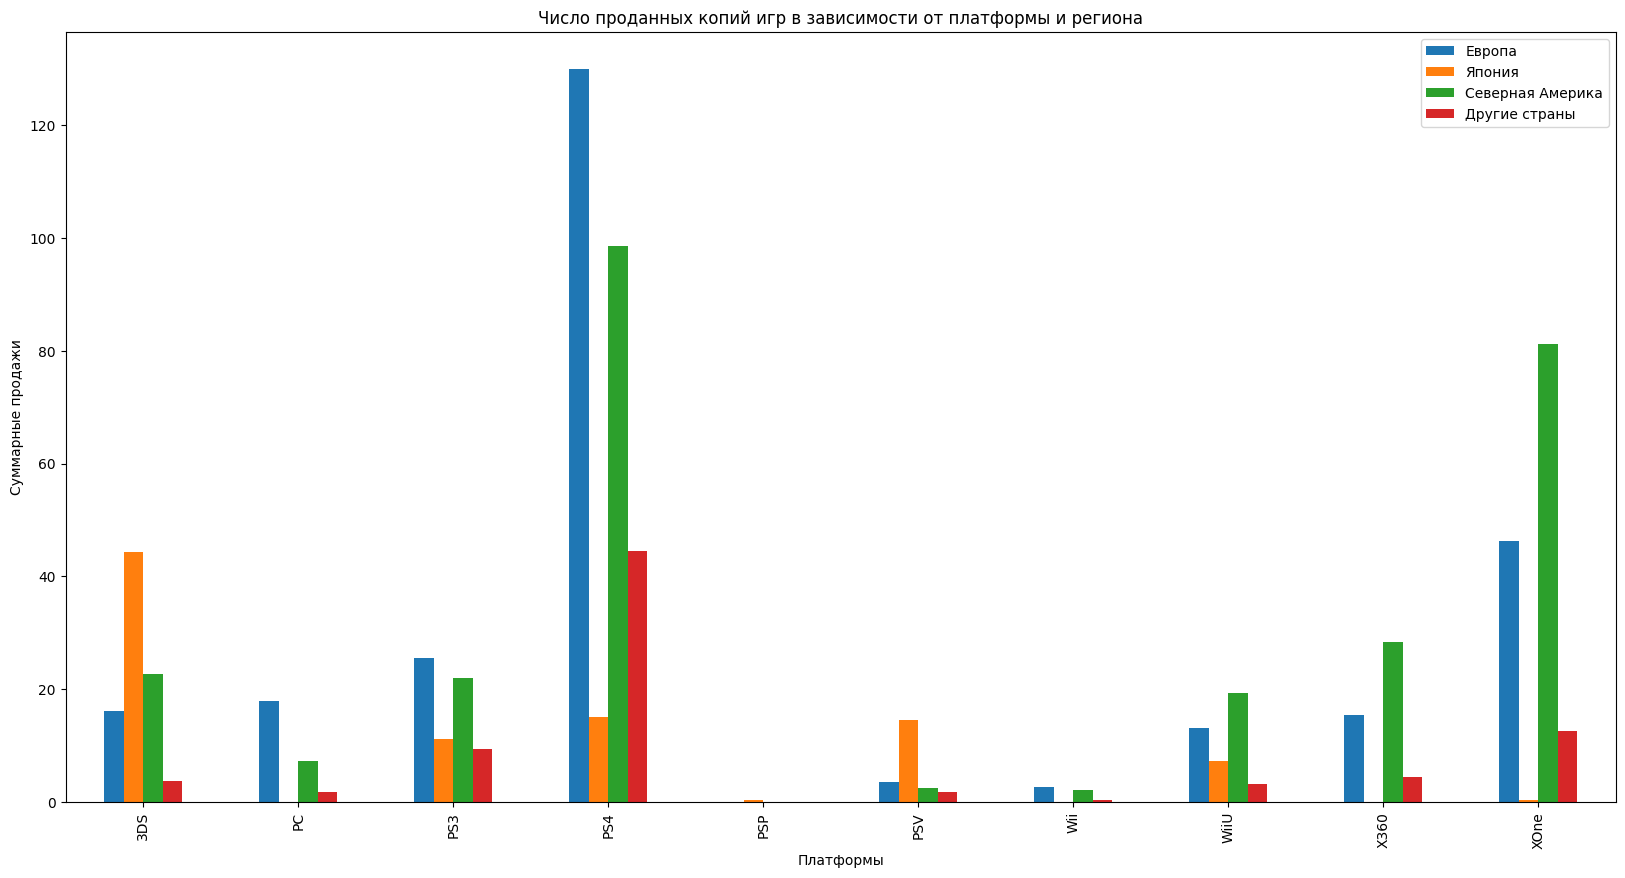

In [52]:
t.plot.bar(title='Число проданных копий игр в зависимости от платформы и региона',
                                             xlabel='Платформы', ylabel='Суммарные продажи', figsize=(20,10));

Определим ТОП-5 платформ для каждого региона.

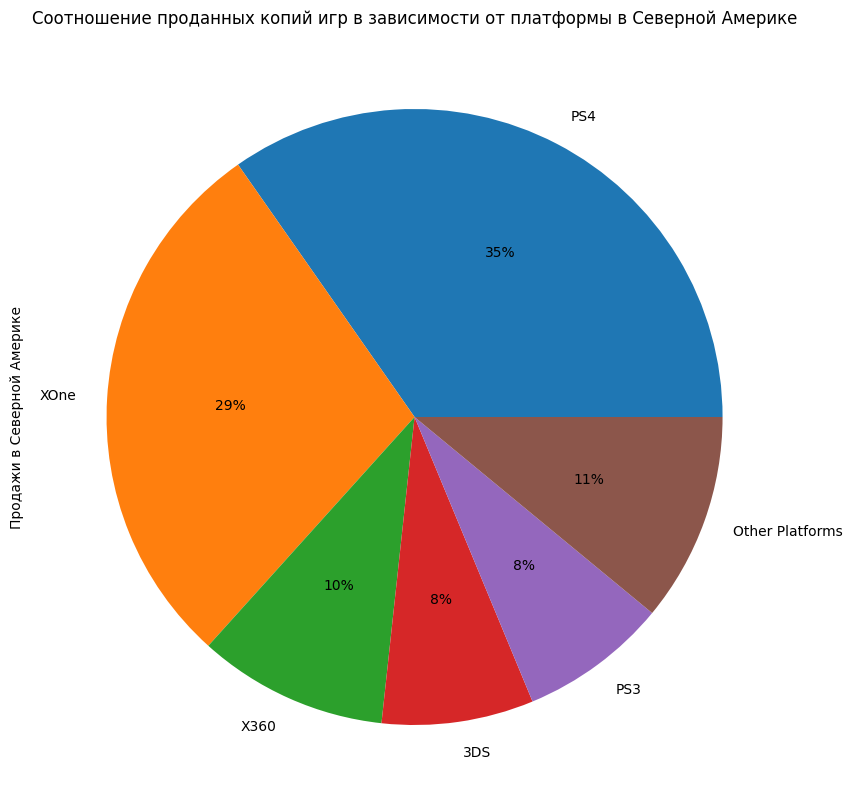

In [53]:
t=data_new.groupby('platform')['na_sales'].sum().sort_values(ascending=False)
t = pd.concat([t[:5], pd.Series(t[5:].sum(), index=['Other Platforms'])])
t.plot(kind='pie', figsize = (10, 10), ylabel='Продажи в Северной Америке',
         title='Соотношение проданных копий игр в зависимости от платформы в Северной Америке', autopct='%.0f%%');

ТОП-5 платформ в Северной Америке: PS4, XOne, X360, 3DS, PS3, причем первые 2 занимают более 60% рынка. Популярность XOne в Америке можно объяснить тем, что ее производитель - американская компания Microsoft.

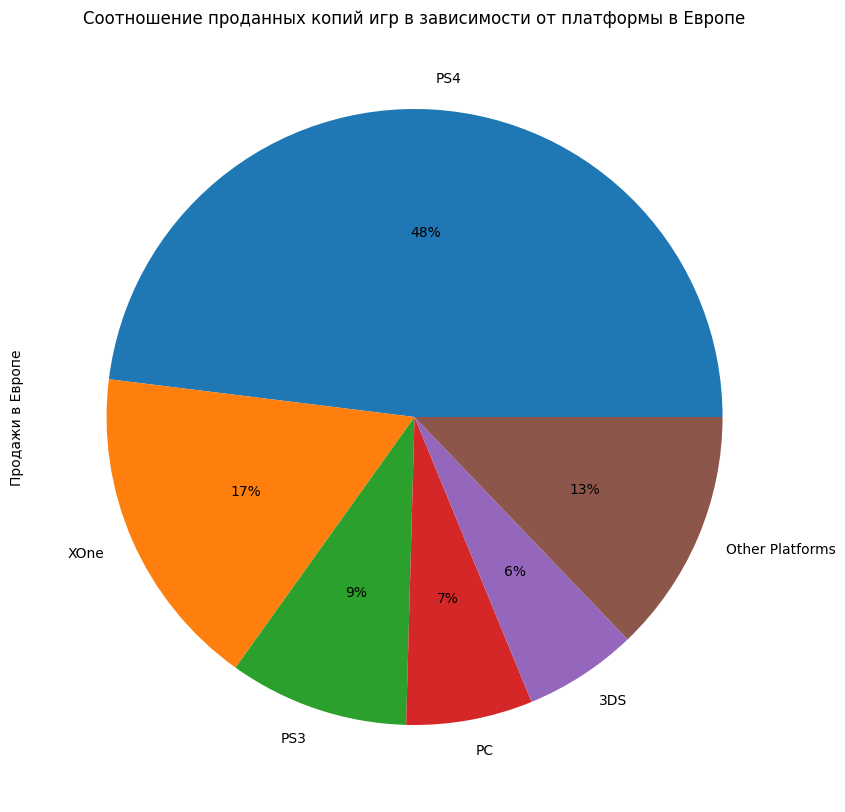

In [54]:
t=data_new.groupby('platform')['eu_sales'].sum().sort_values(ascending=False)
t = pd.concat([t[:5], pd.Series(t[5:].sum(), index=['Other Platforms'])])
t.plot(kind='pie', figsize = (10, 10), ylabel='Продажи в Европе',
         title='Соотношение проданных копий игр в зависимости от платформы в Европе', autopct='%.0f%%');

ТОП-5 платформ в Европе практические такие же: PS4, XOne, X360, PC, 3DS, с большим отрывом лидирует только PS4, у которой почти 50% рынка. Обращает на себя внимание наличие платформы PC на 4-ом месте.

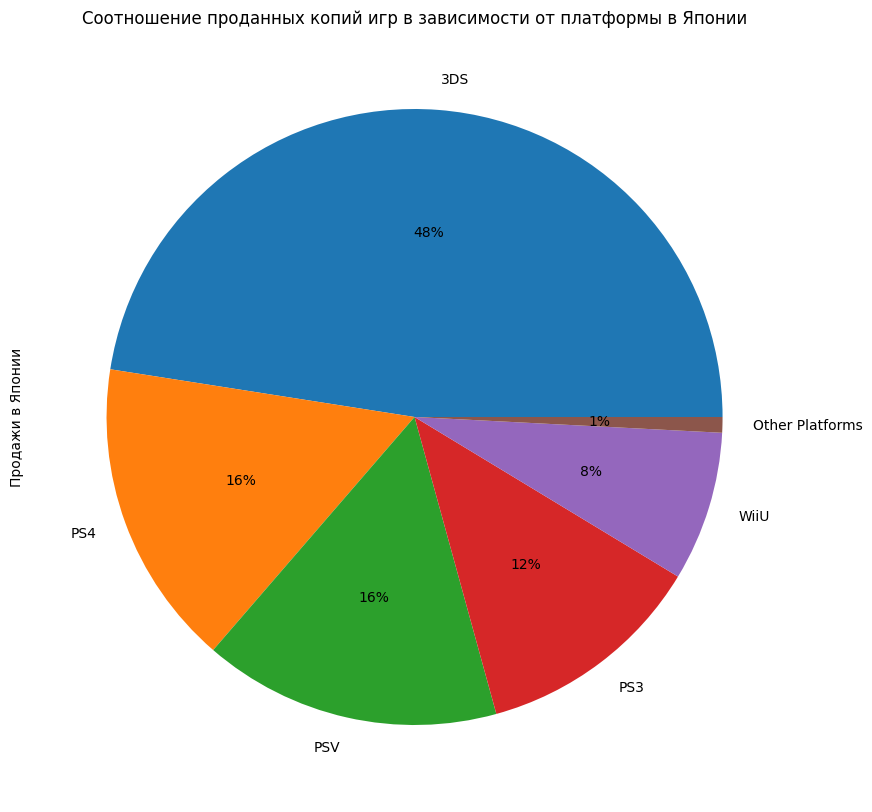

In [55]:
t=data_new.groupby('platform')['jp_sales'].sum().sort_values(ascending=False)
t = pd.concat([t[:5], pd.Series(t[5:].sum(), index=['Other Platforms'])])
t.plot(kind='pie', figsize = (10, 10), ylabel='Продажи в Японии',
         title='Соотношение проданных копий игр в зависимости от платформы в Японии', autopct='%.0f%%');

В Японии картина совершенно другая. На первом месте с большим отрывом 3DS (вероятно потому что эта платформа производится в Японии), она занимает почти 50% рынка, далее идут PS4, PSV, PS3 и WiiU. XOne в Японии совсем не пользуется популярностью.

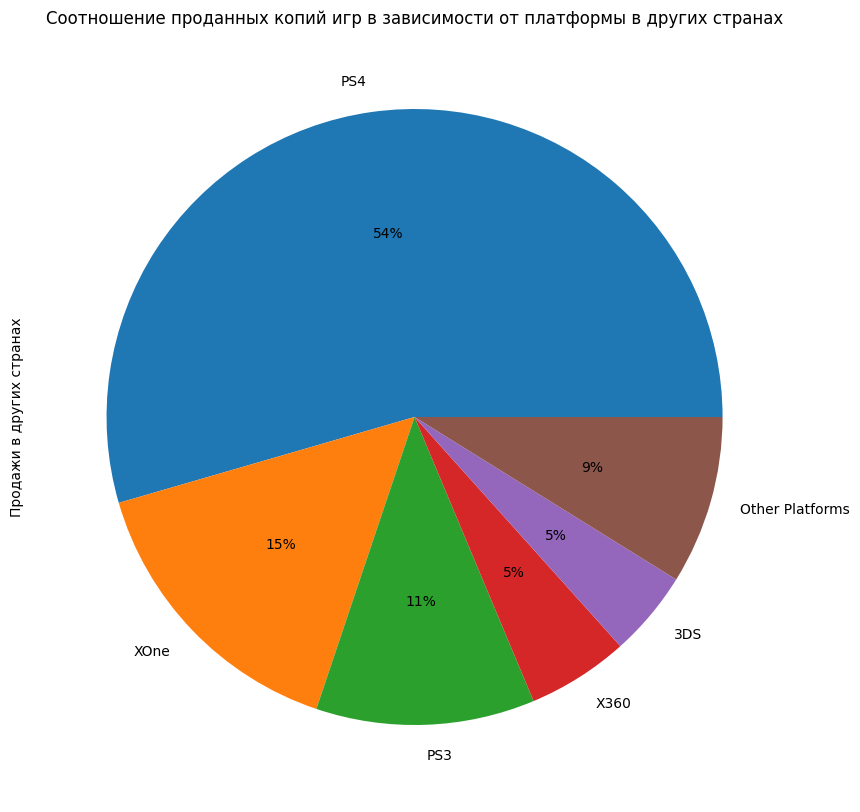

In [56]:
t=data_new.groupby('platform')['other_sales'].sum().sort_values(ascending=False)
t = pd.concat([t[:5], pd.Series(t[5:].sum(), index=['Other Platforms'])])
t.plot(kind='pie', figsize = (10, 10), ylabel='Продажи в других странах',
         title='Соотношение проданных копий игр в зависимости от платформы в других странах', autopct='%.0f%%');

В других странах ТОП-5 платформ примерно соответствует общемировой картине. С большим отрывом лидирует платформа PS4 (более 54% рынка).

#### 4.2.

Теперь выясним, какие жанры игр популярны в разных регионах.

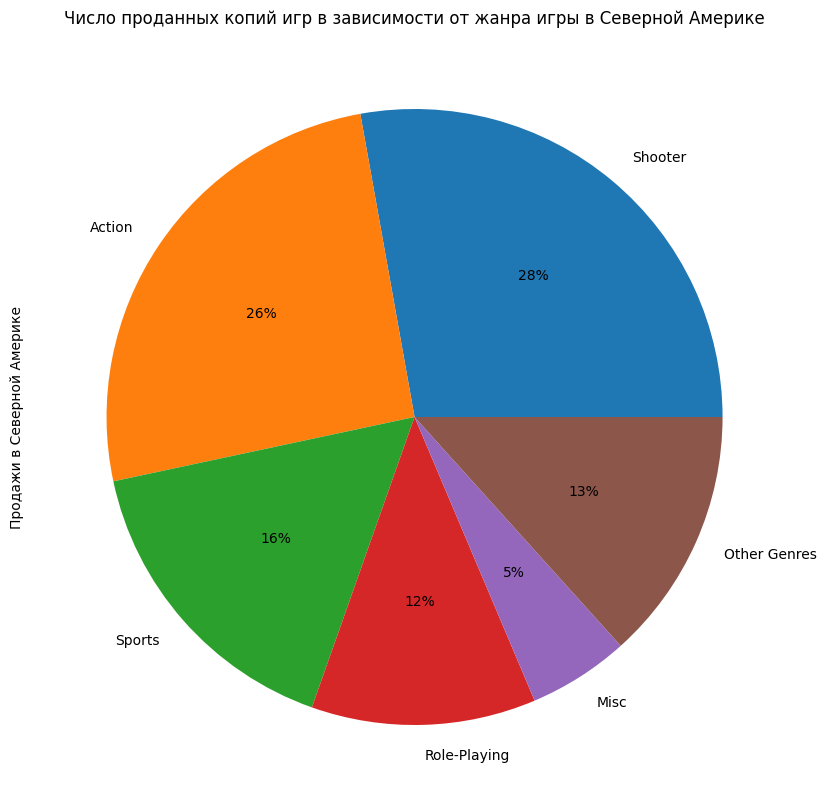

In [57]:
t=data_new.groupby('genre')['na_sales'].sum().sort_values(ascending=False)
t = pd.concat([t[:5], pd.Series(t[5:].sum(), index=['Other Genres'])])
t.plot(kind='pie', figsize = (10, 10), ylabel='Продажи в Северной Америке',
         title='Число проданных копий игр в зависимости от жанра игры в Северной Америке', autopct='%.0f%%');

В Северной Америке ТОП-5 жанров это Shooter, Action, Sports Role-Playing и Misc.

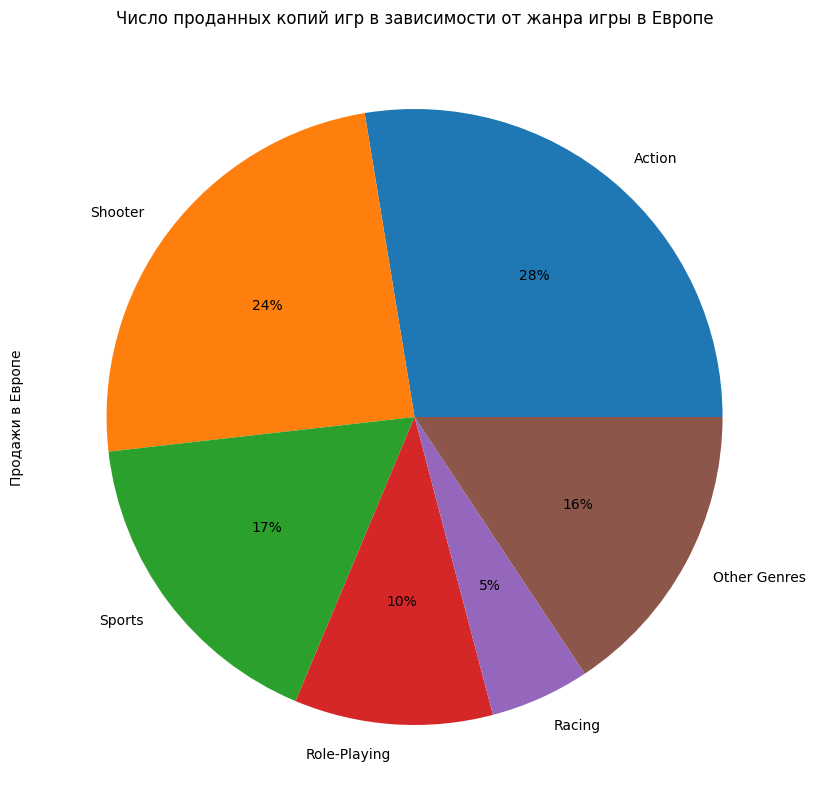

In [58]:
t=data_new.groupby('genre')['eu_sales'].sum().sort_values(ascending=False)
t = pd.concat([t[:5], pd.Series(t[5:].sum(), index=['Other Genres'])])
t.plot(kind='pie', figsize = (10, 10), ylabel='Продажи в Европе',
         title='Число проданных копий игр в зависимости от жанра игры в Европе', autopct='%.0f%%');

В Европе ТОП-5 жанров практически те же, но первые два поменялись местами, а на 5-ом месте Racing.

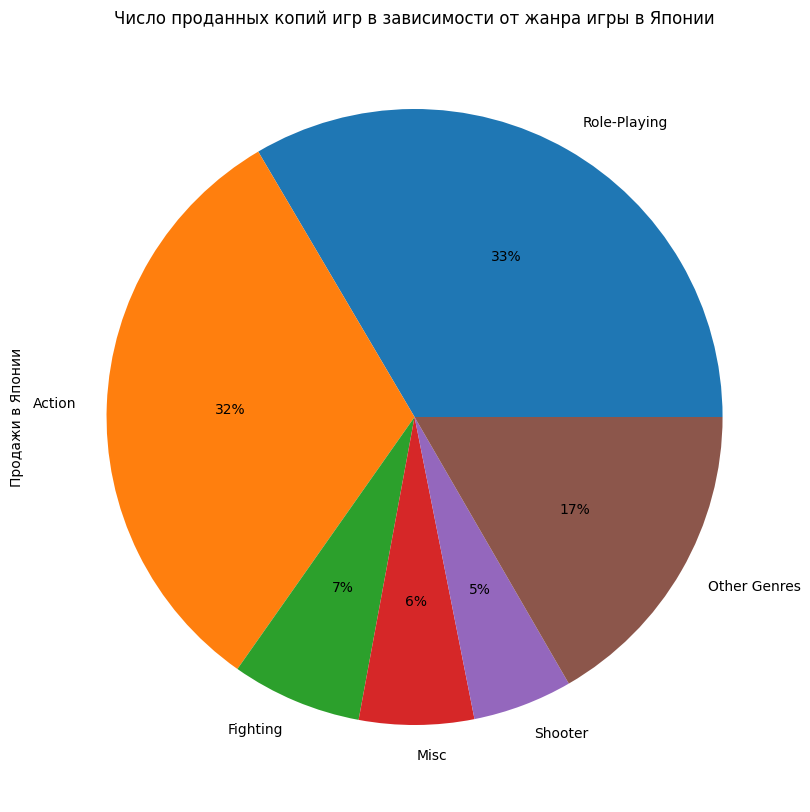

In [59]:
t=data_new.groupby('genre')['jp_sales'].sum().sort_values(ascending=False)
t = pd.concat([t[:5], pd.Series(t[5:].sum(), index=['Other Genres'])])
t.plot(kind='pie', figsize = (10, 10), ylabel='Продажи в Японии',
         title='Число проданных копий игр в зависимости от жанра игры в Японии', autopct='%.0f%%');

В Японии лидируют RPG и Action, дальше идет Fighting, Misc и Shooter. Возможно это связано с популярностью в Японии платформы 3DS, для нее выпускают больше популярных RPG игр, чем для PS4 например. Это можно проверить, посмотрев, сколько разных жанров выпущено для разных платформ.

In [60]:
data_new.query('platform=="PS4"').pivot_table(index='genre', values='name', aggfunc='count')

,name
genre,
Action,142
Adventure,28
Fighting,17
Misc,19
Platform,9
Puzzle,1
Racing,18
Role-Playing,51
Shooter,38


In [61]:
data_new.query('platform=="3DS"').pivot_table(index='genre', values='name', aggfunc='count')

,name
genre,
Action,87
Adventure,21
Fighting,5
Misc,20
Platform,8
Puzzle,7
Role-Playing,41
Simulation,10
Sports,5


Вот и объяснение, почему в Японии шутеры на 5-ом месте. Для самой популярной платформы в Японии 3DS шутеры не выпускаются вовсе.

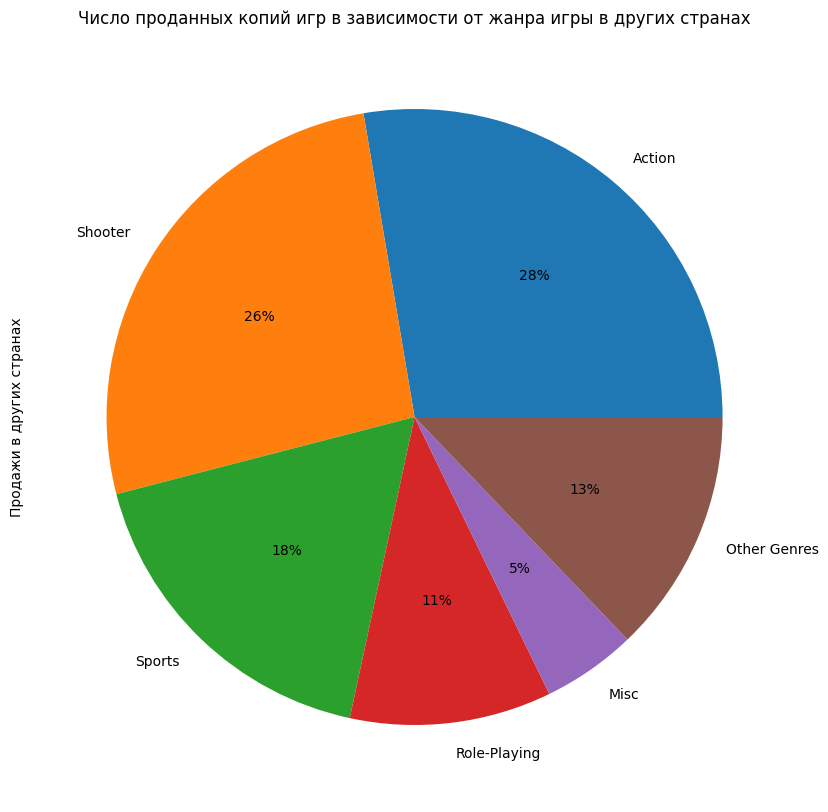

In [62]:
t=data_new.groupby('genre')['other_sales'].sum().sort_values(ascending=False)
t = pd.concat([t[:5], pd.Series(t[5:].sum(), index=['Other Genres'])])
t.plot(kind='pie', figsize = (10, 10), ylabel='Продажи в других странах',
         title='Число проданных копий игр в зависимости от жанра игры в других странах', autopct='%.0f%%');

В других странах ТОП-5 жанров совпадает с общемировыми данными.

#### 4.3.
Осталось понять, как влияет рейтинг ERSB на продажи в отдельном регионе.

In [63]:
t=data_new.pivot_table(index='rating', values=['na_sales', 'eu_sales', 'jp_sales', 'other_sales'], aggfunc='sum')
t.columns=['Европа','Япония','Северная Америка','Другие страны']
t

,Европа,Япония,Северная Америка,Другие страны
rating,,,,
E,58.06,8.94,50.74,15.39
E10+,26.16,4.46,33.23,7.83
M,93.44,8.01,96.42,28.67
T,34.07,14.78,38.95,11.33


Рейтингов слишком мало, поэтому нет смысла строить отдельные графики для каждого региона. Видно, что в Европе, Америке и других странах преобладают игры с рейтингом M, в Японии же преобладают игры с рейтингом T. Скорее всего это снова связано с платформой 3DS, которая имеет почти половину игрового рынка в Японии. Проверим это, посмотрев, сколько игр с разными рейтингами выпускается платформой 3DS и платформой PS4, которая преобладает в остальных регионах.

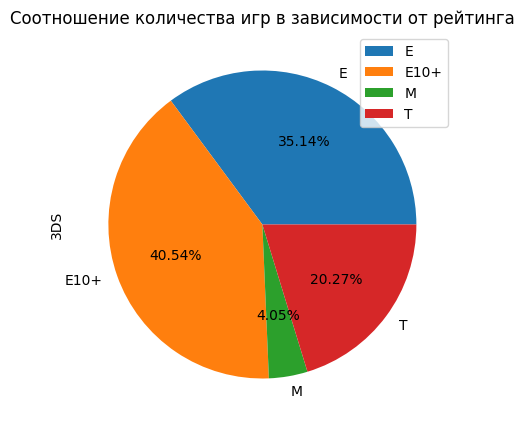

In [64]:
data_new.query('platform=="3DS"').pivot_table(index='rating', values='name', aggfunc='count')\
.plot.pie(y='name', figsize = (5, 5), ylabel='3DS',
         title='Соотношение количества игр в зависимости от рейтинга',
         autopct='%1.2f%%');

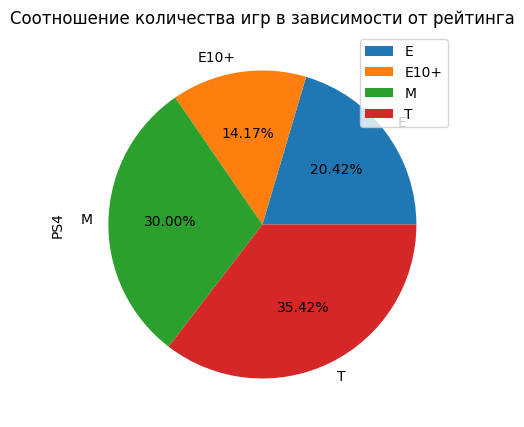

In [65]:
data_new.query('platform=="PS4"').pivot_table(index='rating', values='name', aggfunc='count')\
.plot.pie(y='name', figsize = (5, 5), ylabel='PS4',
         title='Соотношение количества игр в зависимости от рейтинга',
         autopct='%1.2f%%');

Вот и ответ. Для платформы 3DS выпущено всего 4% игр с рейтингом М от общего количества игр этой платформы, а для PS4 таких игр - 30% от общего количества. 

***Вывод:***
В этом разделе мы постарались построить портреты пользователей разных регионов. Сначала выяснили какие игровые платформы преобладают в разных регионах. Выяснилось, что сильнее всех отличается Япония, где преобладает платформа 3DS, выпускаемая японской компанией Nintendo. В других регионах лидирует платформа PS4 от транснациональной Sony. Кроме того, в Северной Америке очень популярна платформа XOne от американской Microsoft.

Далее мы определили популярные жанры игр по регионам. Кроме Японии лидируют шутеры и экшн. В Японии, из-за преобладания платформы 3DS в лидерах RPG, так как шутеров для 3DS просто нет.

И наконец, мы посмотрели игры с каким рейтингом наиболее популярны в каждом регионе. И снова во всех регионах, кроме Японии, самые популярные это игры для взрослых с рейтингом M. В Японии же на первом месте игры для подростков с рейтингом T, так для платформы 3DS игры с рейтингом М практически не выходят.


### 5. Проверка гипотез

#### 5.1.
Проверим гипотезу о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые. Для этого сначала сделаем выборки по интересующим нас платформам и уберем пустые значения в колонке user_score.

In [66]:
t_xone=data_new.query('platform=="XOne"')
t_xone = t_xone.dropna(subset=['user_score'])
t_xone.info()

<class 'pandas.core.frame.DataFrame'>
Index: 165 entries, 165 to 16660
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             165 non-null    object 
 1   platform         165 non-null    object 
 2   year_of_release  165 non-null    int64  
 3   genre            165 non-null    object 
 4   na_sales         165 non-null    float64
 5   eu_sales         165 non-null    float64
 6   jp_sales         165 non-null    float64
 7   other_sales      165 non-null    float64
 8   critic_score     151 non-null    float64
 9   user_score       165 non-null    float64
 10  rating           159 non-null    object 
 11  all_sales        165 non-null    float64
dtypes: float64(7), int64(1), object(4)
memory usage: 16.8+ KB


In [67]:
t_pc=data_new.query('platform=="PC"')
t_pc = t_pc.dropna(subset=['user_score'])
t_pc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 122 entries, 458 to 16692
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             122 non-null    object 
 1   platform         122 non-null    object 
 2   year_of_release  122 non-null    int64  
 3   genre            122 non-null    object 
 4   na_sales         122 non-null    float64
 5   eu_sales         122 non-null    float64
 6   jp_sales         122 non-null    float64
 7   other_sales      122 non-null    float64
 8   critic_score     115 non-null    float64
 9   user_score       122 non-null    float64
 10  rating           109 non-null    object 
 11  all_sales        122 non-null    float64
dtypes: float64(7), int64(1), object(4)
memory usage: 12.4+ KB


Теперь проведем двусторонний статистический тест для двух независимых выборок. Нулевая гипотеза будет утверждать, что средняя оценка пользователями игр на платформе XOne равна средней оценке пользователями игр на платформе PC. По альтернативной гипотезе средняя оценка пользователями игр на платформе XOne не равна средней оценке пользователями игр на платформе PC.

In [68]:
print('Средняя оценка пользователями игр на платформе XOne:', t_xone['user_score'].mean().round(2))
print('Средняя оценка пользователями игр на платформе PC:', t_pc['user_score'].mean().round(2))
alpha = 0.05
results = st.ttest_ind(t_xone['user_score'], t_pc['user_score'])
print('p-значение:', results.pvalue)
if (results.pvalue < alpha ):
    print('Отвергаем нулевую гипотезу.', 
          'Средняя оценка пользователями игр на платформе XOne не равна средней оценке пользователями игр на платформе PC')
else:
    print('Не отвергаем нулевую гипотезу.',
          'Средняя оценка пользователями игр на платформе XOne равна средней оценке пользователями игр на платформе PC') 

Средняя оценка пользователями игр на платформе XOne: 6.59
Средняя оценка пользователями игр на платформе PC: 6.3
p-значение: 0.10450507919348415
Не отвергаем нулевую гипотезу. Средняя оценка пользователями игр на платформе XOne равна средней оценке пользователями игр на платформе PC


#### 5.2.
Проверим гипотезу о том, что средние пользовательские рейтинги для игр с жанрами Action и Sports разные. Для этого сначала сделаем выборки по интересующим нас жанрам и уберем пустые значения в колонке user_score.

In [69]:
t_action=data_new.query('genre=="Action"')
t_action = t_action.dropna(subset=['user_score'])
t_action.info()

<class 'pandas.core.frame.DataFrame'>
Index: 297 entries, 42 to 16692
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             297 non-null    object 
 1   platform         297 non-null    object 
 2   year_of_release  297 non-null    int64  
 3   genre            297 non-null    object 
 4   na_sales         297 non-null    float64
 5   eu_sales         297 non-null    float64
 6   jp_sales         297 non-null    float64
 7   other_sales      297 non-null    float64
 8   critic_score     227 non-null    float64
 9   user_score       297 non-null    float64
 10  rating           287 non-null    object 
 11  all_sales        297 non-null    float64
dtypes: float64(7), int64(1), object(4)
memory usage: 30.2+ KB


In [70]:
t_sports=data_new.query('genre=="Sports"')
t_sports = t_sports.dropna(subset=['user_score'])
t_sports.info()

<class 'pandas.core.frame.DataFrame'>
Index: 127 entries, 77 to 16643
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             127 non-null    object 
 1   platform         127 non-null    object 
 2   year_of_release  127 non-null    int64  
 3   genre            127 non-null    object 
 4   na_sales         127 non-null    float64
 5   eu_sales         127 non-null    float64
 6   jp_sales         127 non-null    float64
 7   other_sales      127 non-null    float64
 8   critic_score     83 non-null     float64
 9   user_score       127 non-null    float64
 10  rating           123 non-null    object 
 11  all_sales        127 non-null    float64
dtypes: float64(7), int64(1), object(4)
memory usage: 12.9+ KB


Теперь проведем двусторонний статистический тест для двух независимых выборок. Нулевая гипотеза будет утверждать, что средняя оценка пользователями игр жанра Action равна средней оценке пользователями игр жанра Sports. По альтернативной гипотезе средняя оценка пользователями игр жанра Action не равна средней оценке пользователями игр жанра Sports.

In [71]:
print('Средняя оценка пользователями игр жанра Action:', t_action['user_score'].mean().round(2))
print('Средняя оценка пользователями игр жанра Sports:', t_sports['user_score'].mean().round(2))
alpha = 0.05
results = st.ttest_ind(t_action['user_score'], t_sports['user_score'])
print('p-значение:', results.pvalue)
if (results.pvalue < alpha ):
    print('Отвергаем нулевую гипотезу.', 
          'Cредняя оценка пользователями игр жанра Action не равна средней оценке пользователями игр жанра Sports.')
else:
    print('Не отвергаем нулевую гипотезу.',
          'Cредняя оценка пользователями игр жанра Action равна средней оценке пользователями игр жанра Sports.') 

Средняя оценка пользователями игр жанра Action: 6.76
Средняя оценка пользователями игр жанра Sports: 5.23
p-значение: 2.8711147985105864e-19
Отвергаем нулевую гипотезу. Cредняя оценка пользователями игр жанра Action не равна средней оценке пользователями игр жанра Sports.


***Вывод:*** Таким образом, обе гипотезы оказались не отвергнуты. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые, а средние пользовательские рейтинги для игр с жанрами Action и Sports разные.

### Общие выводы

1. На первом этапе работы мы загрузили датасет и изучили общую информацию. В датасете 16715 строк, полностью данные имеются в 5 колонках из 10. Кроме того, в некоторых колонках явно не тот тип данных. 

2. На этапе предобработки данных мы провели проверку данных на дубликаты и убрали имеющиеся неявные дубликаты в столбцах user_score и rating путем замены их на аналогичные по смыслу. Нашли пропущенные значения в столбцах с названием игр и жанром (их было всего 2), удалили эти строки, также удалили 1.5% строк от общего датасета, в которых не заполнен год выпуска. Пропуски в других колонках пока не стали трогать. Кроме того, изменили формат в колонках с годом выпуска и оценкой пользователей и добавили колонку с суммарным количеством копий проданных игр по всем регионам.

3. Проведя исследовательский анализ, выяснили, что больше всего игр выпущено с 2005 до 2011 года, что средний срок использования популярных платформ около 11 лет, а максимальные продажи игр на платформах наблюдаются примерно со второго по 4-5 год жизни платформы, поэтому для дальнейшего анализа мы взяли платформы с годом выпуска игр, начиная с 2014 года.
    Изучив распределение количества продаж игр некоторых платформ по годам релиза игр, мы пришли к выводу, что потенциально прибыльными платформами в 2017 году могут стать PS4 и XOne. В этом мы убедились, дополнительно построив диаграмму "ящик с усами" и выяснив медианы продаж разных платформ.
    Мы посмотрели зависимость между оценками критиков и игроков и количеством продаж игр и выяснили, что имеется прямая зависимость между величиной оценок критиков и продажами игр, но она не очень сильная, зависимости продаж от оценки пользователей не обнаружено.
    И наконец, мы установили, что больше всего выпускается игр для жанра Action, они же и имеют самое большое число продаж, но в абсолютных цифрах. Если посмотреть среднее число продаж на одну игру, то безусловных лидером является жанр Shooter. На последнем месте по данному показателю игры жанра Adventure.

4. На данном этапе работы мы постарались построить портреты пользователей разных регионов. Сначала выяснили какие игровые платформы преобладают в разных регионах. Выяснилось, что сильнее всех отличается Япония, где преобладает платформа 3DS, выпускаемая японской компанией Nintendo. В других регионах лидирует платформа PS4 от транснациональной Sony. Кроме того, в Северной Америке очень популярна платформа XOne от американской Microsoft.
    Далее мы определили популярные жанры игр по регионам. Кроме Японии лидируют шутеры и экшн. В Японии, из-за преобладания платформы 3DS в лидерах RPG, так как шутеров для 3DS просто нет.
    И наконец, мы посмотрели игры с каким рейтингом наиболее популярны в каждом регионе. И снова во всех регионах, кроме Японии, самые популярные это игры для взрослых с рейтингом M. В Японии же на первом месте игры для подростков с рейтингом T, так для платформы 3DS игры с рейтингом М практически не выходят.

5. Для проверки нам были представлены две гипотезы. После проведения статистических тестов стало ясно, что обе гипотезы подтвердились. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые, а средние пользовательские рейтинги для игр с жанрами Action и Sports разные.

***Таким образом, в 2017 году для получения максимальной прибыли интернет-магазину следует отдать предпочтение играм для платформ PS4, XOne, 3DS с жанрами Shooter, RPG и Action.***